# Advanced Python for Data Science

## Assignment 6 - Internet Data

In this assignment you will gain some hands-on experience using REST to retrieve JSON-formatted data from the internet and then converting that data to a useable form.   

Insipration for this Assignment came from two excellent resources

- [API Integeration in Python](https://realpython.com/api-integration-in-python/)
- [How to Fuel your Data Science Projects using REST APIs](https://medium.com/mlearning-ai/how-to-fuel-your-data-science-projects-using-rest-apis-3cea0d2a70e9)


## Part 1, REST & JSON in Python

To get started, let's import the libaries we will need.    Hopefully you have requests and json; if not, add them to your environment.

In [1]:
import numpy as np
import pandas as pd

import matplotlib as plt
%matplotlib inline

import requests
import json

print(f'NumPy:      {np.__version__}')
print(f'Pandas:     {pd.__version__}')
print(f'matplotlib: {plt.__version__}')
print(f'Requests:   {requests.__version__}')
print(f'JSON:       {json.__version__}')


NumPy:      1.20.1
Pandas:     1.2.4
matplotlib: 3.3.4
Requests:   2.25.1
JSON:       2.0.9



## Our first  REST example

Our first RESTfull example is a simple one -- let's grab the current exchange rates for each currency to US dollars.  Maybe you are building a billing system for an international web site, and need current exchange data to properly disply the product cost in different countries.

We're going to use a datasource from [rapidapi.com](http://rapdiapi,com), a site with lots of useful data sources.     Specifically, we will use the [ExchangeRate-API](https://rapidapi.com/exchangerateapi/api/exchangerate-api/), which is free (we like free!)

### Define URL

We begin by defining the URL which provides access to our endpoint


In [2]:

requestURL = "https://exchangerate-api.p.rapidapi.com/rapid/latest/USD"



The url includes:
- `https://`   - the communication protocol
- `exchangerate-api.p.rapidapi.com` - the domain name for the service
- `/rapid/latest/USD` - the REST endpoint.   In this case, the `USD` is a parameter being passed to specify that we want exhcange rates for converting to US Dollars


Now, it's frequently the case that a REST API will receive and process header parameters.  RapdiAPI expects two parameters for the call -- the host and the key associated with your account.    Here's how they get specified:


In [3]:
headers = {
    'x-rapidapi-key': "3621a7164emshf38578146b0bafcp16cd08jsnb41129369b33",   # you may need to create your own key
    'x-rapidapi-host': "exchangerate-api.p.rapidapi.com"
}



It's quite possible that my key won't work for you.   If that's the case, you would need to create an account at [RapidAPI.com](http://rapidAPI.com), find the page for this API (see URL above), and copy the `x-rapidapi-key` it displays for your account.

### Make REST API Request

OK, with the URL and headers defined, let's  make our RESTfull call.    As REST uses HTTP as it's underlying network transport protocol.  We will use the Python `requests` library to make our call.   


In [4]:

response = requests.request("GET", requestURL, headers=headers)



Did it work?   Well, we don't quite know yet.   Let's look at response.  What type of data is it?

In [5]:
print(type(response))

<class 'requests.models.Response'>



Oooh, it's an object class.   I wonder what attributes it has?

In [6]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

`status_code` looks interesting.   Let's check it out

In [7]:
print(response.status_code)


200


A 200 is good!  We made a successful call.   

### Process the response to get our resource

Now, where is out data?    maybe in `json` ?

In [8]:
print(response.json)

<bound method Response.json of <Response [200]>>


A bound method?   Ah, tricky object!  Let's add parenthesis and call the method.

In [9]:
print(response.json())

{'result': 'success', 'provider': 'https://www.exchangerate-api.com', 'documentation': 'https://www.exchangerate-api.com/docs/free', 'terms_of_use': 'https://www.exchangerate-api.com/terms', 'time_last_update_unix': 1638576152, 'time_last_update_utc': 'Sat, 04 Dec 2021 00:02:32 +0000', 'time_next_update_unix': 1638663982, 'time_next_update_utc': 'Sun, 05 Dec 2021 00:26:22 +0000', 'time_eol_unix': 0, 'base_code': 'USD', 'rates': {'USD': 1, 'AED': 3.67, 'AFN': 96.17, 'ALL': 107.02, 'AMD': 489.42, 'ANG': 1.79, 'AOA': 573.9, 'ARS': 101.02, 'AUD': 1.42, 'AWG': 1.79, 'AZN': 1.7, 'BAM': 1.73, 'BBD': 2, 'BDT': 85.72, 'BGN': 1.73, 'BHD': 0.376, 'BIF': 1989.58, 'BMD': 1, 'BND': 1.37, 'BOB': 6.87, 'BRL': 5.64, 'BSD': 1, 'BTN': 75.31, 'BWP': 11.77, 'BYN': 2.54, 'BZD': 2, 'CAD': 1.28, 'CDF': 2002.5, 'CHF': 0.919, 'CLP': 837.66, 'CNY': 6.38, 'COP': 3983.84, 'CRC': 628.82, 'CUC': 1, 'CUP': 25, 'CVE': 97.57, 'CZK': 22.49, 'DJF': 177.72, 'DKK': 6.6, 'DOP': 56.41, 'DZD': 139.14, 'EGP': 15.71, 'ERN': 15,

Better!   We have some json data to play with.    That looks alot like a python dictionary, doesn't it?   I wonder, just what does this `json()` method do?    Let's save the results to a new variable and inspect it's data type.

In [10]:
ratedata = response.json()
print(type(ratedata))

<class 'dict'>


We have a dictionary!     Let's look at the keys.

In [11]:
for key in ratedata.keys():
    print(key)

result
provider
documentation
terms_of_use
time_last_update_unix
time_last_update_utc
time_next_update_unix
time_next_update_utc
time_eol_unix
base_code
rates


`rates` -- we're getting close!  Let's grab the rates

In [12]:

rates = ratedata['rates']
print(type(rates))

<class 'dict'>


Ah, `rates` is itself a dictionary.   That makes sense - very easy to look up the exchange rate for an individual country.  Let's see what our dictionary holds

In [13]:

for country, Xrate in rates.items():
    print(f'{country}, {Xrate}')

USD, 1
AED, 3.67
AFN, 96.17
ALL, 107.02
AMD, 489.42
ANG, 1.79
AOA, 573.9
ARS, 101.02
AUD, 1.42
AWG, 1.79
AZN, 1.7
BAM, 1.73
BBD, 2
BDT, 85.72
BGN, 1.73
BHD, 0.376
BIF, 1989.58
BMD, 1
BND, 1.37
BOB, 6.87
BRL, 5.64
BSD, 1
BTN, 75.31
BWP, 11.77
BYN, 2.54
BZD, 2
CAD, 1.28
CDF, 2002.5
CHF, 0.919
CLP, 837.66
CNY, 6.38
COP, 3983.84
CRC, 628.82
CUC, 1
CUP, 25
CVE, 97.57
CZK, 22.49
DJF, 177.72
DKK, 6.6
DOP, 56.41
DZD, 139.14
EGP, 15.71
ERN, 15
ETB, 48.32
EUR, 0.885
FJD, 2.13
FKP, 0.754
FOK, 6.6
GBP, 0.754
GEL, 3.12
GGP, 0.754
GHS, 6.51
GIP, 0.754
GMD, 52.65
GNF, 9530.41
GTQ, 7.72
GYD, 209.4
HKD, 7.79
HNL, 24.11
HRK, 6.67
HTG, 98.95
HUF, 322.28
IDR, 14386.85
ILS, 3.17
IMP, 0.754
INR, 75.32
IQD, 1461.01
IRR, 41907.56
ISK, 129.9
JMD, 155.31
JOD, 0.709
JPY, 113.09
KES, 113.07
KGS, 84.8
KHR, 4076.37
KID, 1.42
KMF, 435.34
KRW, 1181.06
KWD, 0.3
KYD, 0.833
KZT, 437.68
LAK, 10839.69
LBP, 1507.5
LKR, 201.59
LRD, 141.87
LSL, 15.98
LYD, 4.6
MAD, 9.1
MDL, 17.71
MGA, 3209.81
MKD, 54.41
MMK, 1786.12
MNT, 2869


And there you go - we just fetched the exchange rates for currencies off the internet, and it's in a dictionary we can use inside our program.



## A more complicated example

Let's look at more interesting data.   Maybe you're trying to build a dashboard of world-wide COVID cases.   Here's an API which provides worldwide information about COVID-19:

[VACCOVID - coronavirus, vaccine and treatment tracker](https://rapidapi.com/vaccovidlive-vaccovidlive-default/api/vaccovid-coronavirus-vaccine-and-treatment-tracker/)

Let's create our GET request and fetch the data

In [14]:

# a slightly more interesting data set -- Worlwide COVID Data
# Again, you may need to create an account and get your own key
#NOTE: Used the example code from class

url = "https://eu-covid-19-travel.p.rapidapi.com/data"
querystring = {"colour":"green","sort":"high"}
headers = {
    'x-rapidapi-host': "eu-covid-19-travel.p.rapidapi.com",
    'x-rapidapi-key': "3621a7164emshf38578146b0bafcp16cd08jsnb41129369b33"
    }
response = requests.request("GET", url, headers=headers, params=querystring)


OK, did that work?

In [15]:
print(response.status_code)

200


Again, `status_code` 200 is success.  Let's check out our data !

In [16]:
print(response.json())

[{'country': 'Poland', 'country_code': 'PL', 'geo_id_final': 'PL82', 'region': 'Podkarpackie', 'subnational_cases_7': 558, 'subnational_cases_14': 1015, 'subnational_population': 2084447, 'subnational_rate_14': 48.6939701513159, 'national_cases_7': 11755, 'national_population': 37958138, 'national_testing_rate': 670.401693570955, 'national_positivity_rate': 4.61936873211984, 'subnational_testing_data': 'TRUE', 'positivity_rate_combined': 3.7494960354791, 'testing_rate_combined': 713.954348563432, 'colour': 'Green', 'week': '2021-40'}, {'country': 'Poland', 'country_code': 'PL', 'geo_id_final': 'PL63', 'region': 'Pomorskie', 'subnational_cases_7': 560, 'subnational_cases_14': 965, 'subnational_population': 2316135, 'subnational_rate_14': 41.6642380517543, 'national_cases_7': 11755, 'national_population': 37958138, 'national_testing_rate': 670.401693570955, 'national_positivity_rate': 4.61936873211984, 'subnational_testing_data': 'TRUE', 'positivity_rate_combined': 3.63541937159179, 'tes

In [17]:
countries = response.json()

In [18]:
print(type(countries))

<class 'list'>



Hmm, `countries` is a list, not a dictionary.   I wonder what each entry on the list contains?

In [19]:
print(countries[0])

{'country': 'Poland', 'country_code': 'PL', 'geo_id_final': 'PL82', 'region': 'Podkarpackie', 'subnational_cases_7': 558, 'subnational_cases_14': 1015, 'subnational_population': 2084447, 'subnational_rate_14': 48.6939701513159, 'national_cases_7': 11755, 'national_population': 37958138, 'national_testing_rate': 670.401693570955, 'national_positivity_rate': 4.61936873211984, 'subnational_testing_data': 'TRUE', 'positivity_rate_combined': 3.7494960354791, 'testing_rate_combined': 713.954348563432, 'colour': 'Green', 'week': '2021-40'}


In [20]:
print(type(countries[0]))

<class 'dict'>


So we have a list of dictionaries?   This is typical.  We've retrieved an array - a serialized set of objects, and JSON is used to define the content of each object.    That object is a mix of data -- strings and numbers.   I bet this is a table of data, with a row for each country.

Fortunately, we just learned about Pandas and how useful it can be with tabular data.    Let's convert our list of objects to a Pandas dataframe.

In [21]:
countriesDF = pd.DataFrame(countries)
print(countriesDF.shape)

(49, 17)


In [22]:
countriesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   49 non-null     object 
 1   country_code              49 non-null     object 
 2   geo_id_final              49 non-null     object 
 3   region                    49 non-null     object 
 4   subnational_cases_7       49 non-null     int64  
 5   subnational_cases_14      49 non-null     int64  
 6   subnational_population    49 non-null     int64  
 7   subnational_rate_14       49 non-null     float64
 8   national_cases_7          49 non-null     int64  
 9   national_population       49 non-null     int64  
 10  national_testing_rate     49 non-null     float64
 11  national_positivity_rate  49 non-null     float64
 12  subnational_testing_data  49 non-null     object 
 13  positivity_rate_combined  49 non-null     float64
 14  testing_rate


Notice how clever Pandas was?   The keys in the key-value pairs were used to name the data columns, and wherever possible the data was interpreted as numeric values.   We can use Pandas to describe that numeric data, just like before.

In [23]:
countriesDF.head()

,country,country_code,geo_id_final,region,subnational_cases_7,subnational_cases_14,subnational_population,subnational_rate_14,national_cases_7,national_population,national_testing_rate,national_positivity_rate,subnational_testing_data,positivity_rate_combined,testing_rate_combined,colour,week
0,Poland,PL,PL82,Podkarpackie,558,1015,2084447,48.693970,11755,37958138,670.401694,4.619369,TRUE,3.749496,713.954349,Green,2021-40
1,Poland,PL,PL63,Pomorskie,560,965,2316135,41.664238,11755,37958138,670.401694,4.619369,TRUE,3.635419,665.073495,Green,2021-40
2,Poland,PL,PL21,Małopolskie,658,1209,3371956,35.854560,11755,37958138,670.401694,4.619369,TRUE,3.547744,550.036833,Green,2021-40
3,Poland,PL,PL71,Łódzkie,603,1019,2442685,41.716390,11755,37958138,670.401694,4.619369,TRUE,3.273971,754.006350,Green,2021-40
4,Poland,PL,PL61,Kujawsko-pomorskie,372,635,2050976,30.960869,11755,37958138,670.401694,4.619369,TRUE,3.127364,579.967781,Green,2021-40


In [24]:
countriesDF.describe()

,subnational_cases_7,subnational_cases_14,subnational_population,subnational_rate_14,national_cases_7,national_population,national_testing_rate,national_positivity_rate,positivity_rate_combined,testing_rate_combined
count,49.000000,49.000000,4.900000e+01,49.000000,49.000000,4.900000e+01,49.000000,49.000000,49.000000,49.000000
mean,500.489796,1034.061224,2.284194e+06,45.397367,14664.265306,4.341737e+07,2939.373379,2.209493,1.502291,2708.548158
std,503.509935,1085.613678,2.172518e+06,15.848057,8150.485867,2.061819e+07,4251.745684,1.461374,1.019130,3430.917063
min,10.000000,19.000000,3.874700e+04,15.506934,13.000000,3.874700e+04,670.401694,0.486714,0.140481,465.149697
25%,137.000000,262.000000,6.565090e+05,35.616314,11755.000000,3.795814e+07,1153.654856,0.947154,0.770129,793.611009
50%,372.000000,715.000000,1.524826e+06,43.868401,12049.000000,4.733261e+07,1799.730977,2.206554,0.962884,1488.616185
75%,658.000000,1209.000000,3.313432e+06,56.185396,18282.000000,5.964149e+07,3236.344472,3.135546,2.192024,3572.342170
max,1974.000000,4334.000000,1.002760e+07,74.281886,29452.000000,6.732022e+07,29694.040200,4.619369,3.749496,22950.905384



And now we  have a Pandas dataframe of COVID case data across the Globe.    You could build a dashboard around this data, and then once a day make a new REST request for the latest information and update the dashboard.    Here's an example, where I filter the DataFrame to show the top 20 countries by `TotalCases` and then plot the data using matplotlib.


In [25]:

countriesDF.nlargest(20, 'TotalCases').plot(x='Country', y='TotalCases', kind = 'bar')
plt.pyplot.show()

KeyError: 'TotalCases'


### Financial Data

Yahoo Finance maintains a history of stock prices, and there are handfulls of APIs to gain access.    We'll use a simple one from RapidAPI. [YH Finance API](https://rapidapi.com/apidojo/api/yh-finance/) to explore some stock price trends.

Tesla is a hot stock these days.  Let's grabs its' historical data, convert it to a Pandas dataframe, and plot it.

Now, this API requires a set of parameters in the call.   We create those as a `querystring` dictionary, and pass them along using the `params=` parameter to our `request.request` call.


In [26]:

url = "https://yh-finance.p.rapidapi.com/stock/v3/get-historical-data"    # Our endpoint

querystring = {"symbol":"TSLA","region":"US"}    # the required parameter -- the trading symbol and region

headers = {
    'x-rapidapi-host': "yh-finance.p.rapidapi.com",
    'x-rapidapi-key': "3621a7164emshf38578146b0bafcp16cd08jsnb41129369b33"   # Again, you amy need to update this key
    }

response = requests.request("GET", url, headers=headers, params=querystring)


In [27]:
stockdata = response.json()

In [28]:
print(type(stockdata))

<class 'dict'>


In [29]:
print(stockdata)

{'prices': [{'date': 1638541800, 'open': 1084.7900390625, 'high': 1090.5799560546875, 'low': 1000.2100219726562, 'close': 1014.969970703125, 'volume': 30696300, 'adjclose': 1014.969970703125}, {'date': 1638455400, 'open': 1099.06005859375, 'high': 1113, 'low': 1056.6500244140625, 'close': 1084.5999755859375, 'volume': 24371600, 'adjclose': 1084.5999755859375}, {'date': 1638369000, 'open': 1160.699951171875, 'high': 1172.8399658203125, 'low': 1090.760009765625, 'close': 1095, 'volume': 22816800, 'adjclose': 1095}, {'date': 1638282600, 'open': 1144.3699951171875, 'high': 1168, 'low': 1118, 'close': 1144.760009765625, 'volume': 27092000, 'adjclose': 1144.760009765625}, {'date': 1638196200, 'open': 1100.989990234375, 'high': 1142.6700439453125, 'low': 1100.18994140625, 'close': 1136.989990234375, 'volume': 19464500, 'adjclose': 1136.989990234375}, {'date': 1637937000, 'open': 1099.469970703125, 'high': 1108.780029296875, 'low': 1081, 'close': 1081.9200439453125, 'volume': 11680900, 'adjclo


OK, looks like the dictionary key `prices` has the table of data we want.   Let's convert it to a Pandas dataframe.

In [30]:
stockprice = pd.DataFrame(stockdata['prices'])

In [31]:
stockprice.head()

,date,open,high,low,close,volume,adjclose
0,1638541800,1084.790039,1090.579956,1000.210022,1014.969971,30696300,1014.969971
1,1638455400,1099.060059,1113.000000,1056.650024,1084.599976,24371600,1084.599976
2,1638369000,1160.699951,1172.839966,1090.760010,1095.000000,22816800,1095.000000
3,1638282600,1144.369995,1168.000000,1118.000000,1144.760010,27092000,1144.760010
4,1638196200,1100.989990,1142.670044,1100.189941,1136.989990,19464500,1136.989990



The date field is a number?   Actually, it's a timestamp, and Pandas knows how to convert that to a meaningful date.

In [32]:
stockprice['date'] = pd.to_datetime(stockprice['date'], unit='s')    # convert to date/time

In [33]:
stockprice.head()

,date,open,high,low,close,volume,adjclose
0,2021-12-03 14:30:00,1084.790039,1090.579956,1000.210022,1014.969971,30696300,1014.969971
1,2021-12-02 14:30:00,1099.060059,1113.000000,1056.650024,1084.599976,24371600,1084.599976
2,2021-12-01 14:30:00,1160.699951,1172.839966,1090.760010,1095.000000,22816800,1095.000000
3,2021-11-30 14:30:00,1144.369995,1168.000000,1118.000000,1144.760010,27092000,1144.760010
4,2021-11-29 14:30:00,1100.989990,1142.670044,1100.189941,1136.989990,19464500,1136.989990



Better.  But if I want a daily trend I should drop the timestamp from the date.   


In [34]:
stockprice['date'] =stockprice['date'].dt.date   # remove the timestamp so that we can chart the daily close

In [35]:
stockprice.head()

,date,open,high,low,close,volume,adjclose
0,2021-12-03,1084.790039,1090.579956,1000.210022,1014.969971,30696300,1014.969971
1,2021-12-02,1099.060059,1113.000000,1056.650024,1084.599976,24371600,1084.599976
2,2021-12-01,1160.699951,1172.839966,1090.760010,1095.000000,22816800,1095.000000
3,2021-11-30,1144.369995,1168.000000,1118.000000,1144.760010,27092000,1144.760010
4,2021-11-29,1100.989990,1142.670044,1100.189941,1136.989990,19464500,1136.989990



Nice.   Let's plot the data.

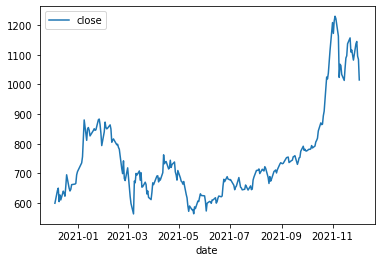

In [36]:
stockprice.plot(x='date', y='close', kind = 'line')
plt.pyplot.show()


I guess Tesla really has been on a roll!


## Part 2, Independant Data Exploration

OK, now that you've seen the basics, here's your chance to build an interesting REST call.  There are a fair number of useful sites out there -- healthcase data, govenment data, sports & entertainment, just about anything you can imagine.   There are even REST APIs which allow you to take advantage of remote functionality like image capture and joke generation. Here's a few sites worth checking out:

- [RapidAPI](https://rapidapi.com/hub)
- [100 Cool and Fun APIs](https://betterprogramming.pub/a-curated-list-of-100-cool-and-fun-public-apis-to-inspire-your-next-project-7600ce3e9b3)
- [NASA APIs](https://api.nasa.gov/index.html)
- [HealthIT.gov](https://www.healthit.gov/data/api)


Your taks is to find a REST API you find interesting, build out the request, explore the response, and do something usefull with the resource returned.     Please be sure to embed any required key/credential in your notebook so that I may recreate your results.

Be creative. And have fun!


I've been wanting to take a look at warcraftlogs.com and their API for some time. Now that I know how I can finally do this.

In [37]:

#TODO Add you code starting here.  Add as many cells as you see fit, and use markdown cells to document what you have done

url = "https://www.warcraftlogs.com:443/v1/classes?api_key=9bcf27b6cdc01679a4f677e9a97a9cf6"    

headers = {
    'x-warcraftlogs-host': "warcraftlogs.com",
    'x-warcraftlogs-key': "9bcf27b6cdc01679a4f677e9a97a9cf6"   
    }

response = requests.request("GET", url, headers=headers)

In [38]:
print(response.status_code)

200


I wanted to do an easy response so I just pulled all of the specs that warcraft logs has on their website

In [39]:
warcraftClasses = response.json()
print(response.json())

[{'id': 1, 'name': 'Death Knight', 'specs': [{'id': 1, 'name': 'Blood'}, {'id': 2, 'name': 'Frost'}, {'id': 3, 'name': 'Unholy'}]}, {'id': 2, 'name': 'Druid', 'specs': [{'id': 1, 'name': 'Balance'}, {'id': 2, 'name': 'Feral'}, {'id': 3, 'name': 'Guardian'}, {'id': 4, 'name': 'Restoration'}]}, {'id': 3, 'name': 'Hunter', 'specs': [{'id': 1, 'name': 'Beast Mastery'}, {'id': 2, 'name': 'Marksmanship'}, {'id': 3, 'name': 'Survival'}]}, {'id': 4, 'name': 'Mage', 'specs': [{'id': 1, 'name': 'Arcane'}, {'id': 2, 'name': 'Fire'}, {'id': 3, 'name': 'Frost'}]}, {'id': 5, 'name': 'Monk', 'specs': [{'id': 1, 'name': 'Brewmaster'}, {'id': 2, 'name': 'Mistweaver'}, {'id': 3, 'name': 'Windwalker'}]}, {'id': 6, 'name': 'Paladin', 'specs': [{'id': 1, 'name': 'Holy'}, {'id': 2, 'name': 'Protection'}, {'id': 3, 'name': 'Retribution'}]}, {'id': 7, 'name': 'Priest', 'specs': [{'id': 1, 'name': 'Discipline'}, {'id': 2, 'name': 'Holy'}, {'id': 3, 'name': 'Shadow'}]}, {'id': 8, 'name': 'Rogue', 'specs': [{'id

In [40]:
print(type(warcraftClasses))

<class 'list'>


It would seem I have gotten a list instead of a dictionary. This is unexpected.

In [41]:
for key in warcraftClasses:
    print(key)

{'id': 1, 'name': 'Death Knight', 'specs': [{'id': 1, 'name': 'Blood'}, {'id': 2, 'name': 'Frost'}, {'id': 3, 'name': 'Unholy'}]}
{'id': 2, 'name': 'Druid', 'specs': [{'id': 1, 'name': 'Balance'}, {'id': 2, 'name': 'Feral'}, {'id': 3, 'name': 'Guardian'}, {'id': 4, 'name': 'Restoration'}]}
{'id': 3, 'name': 'Hunter', 'specs': [{'id': 1, 'name': 'Beast Mastery'}, {'id': 2, 'name': 'Marksmanship'}, {'id': 3, 'name': 'Survival'}]}
{'id': 4, 'name': 'Mage', 'specs': [{'id': 1, 'name': 'Arcane'}, {'id': 2, 'name': 'Fire'}, {'id': 3, 'name': 'Frost'}]}
{'id': 5, 'name': 'Monk', 'specs': [{'id': 1, 'name': 'Brewmaster'}, {'id': 2, 'name': 'Mistweaver'}, {'id': 3, 'name': 'Windwalker'}]}
{'id': 6, 'name': 'Paladin', 'specs': [{'id': 1, 'name': 'Holy'}, {'id': 2, 'name': 'Protection'}, {'id': 3, 'name': 'Retribution'}]}
{'id': 7, 'name': 'Priest', 'specs': [{'id': 1, 'name': 'Discipline'}, {'id': 2, 'name': 'Holy'}, {'id': 3, 'name': 'Shadow'}]}
{'id': 8, 'name': 'Rogue', 'specs': [{'id': 1, 'n

This lists each class and the specializations associated with each. Fun fact, "Warrior" does not have a "Gladiator" spec in-game.

There are options to see different "zones" which are basically different dungeons and raids that are logged. This request will show all possible ones to choose from such that I can look up rankings for a specific dungeon or raid.

In [42]:
url = "https://www.warcraftlogs.com:443/v1/zones?api_key=9bcf27b6cdc01679a4f677e9a97a9cf6"

response = requests.request("GET", url, headers=headers)

In [43]:
print(response.json())

[{'id': 3, 'name': 'Challenge Modes', 'frozen': True, 'encounters': [{'id': 11182, 'name': 'Auchindoun'}, {'id': 11175, 'name': 'Bloodmaul Slag Mines'}, {'id': 11279, 'name': 'The Everbloom'}, {'id': 11208, 'name': 'Grimrail Depot'}, {'id': 11195, 'name': 'Iron Docks'}, {'id': 11176, 'name': 'Shadowmoon Burial Grounds'}, {'id': 11209, 'name': 'Skyreach'}, {'id': 11358, 'name': 'Upper Blackrock Spire'}], 'brackets': {'min': 6, 'max': 6.2, 'bucket': 0.1, 'type': 'Patch'}}, {'id': 4, 'name': 'Throne of Thunder', 'frozen': True, 'encounters': [{'id': 1577, 'name': "Jin'rokh the Breaker"}, {'id': 1575, 'name': 'Horridon'}, {'id': 1570, 'name': 'Council of Elders'}, {'id': 1565, 'name': 'Tortos'}, {'id': 1578, 'name': 'Megaera'}, {'id': 1573, 'name': 'Ji-Kun'}, {'id': 1572, 'name': 'Durumu the Forgotten'}, {'id': 1574, 'name': 'Primordius'}, {'id': 1576, 'name': 'Dark Animus'}, {'id': 1559, 'name': 'Iron Qon'}, {'id': 1560, 'name': 'Twin Consorts'}, {'id': 1579, 'name': 'Lei Shen'}, {'id': 1

Upon closer inspection, this is a list of dictionaries. Each dictionary associated with a whole raid has another dictionary inside of it that has encounter information for each boss. I'm gonna take a look at the most recent raid, "Sanctum."

In [44]:
warcraftZones = response.json()
for key in warcraftZones:
    print(key)

{'id': 3, 'name': 'Challenge Modes', 'frozen': True, 'encounters': [{'id': 11182, 'name': 'Auchindoun'}, {'id': 11175, 'name': 'Bloodmaul Slag Mines'}, {'id': 11279, 'name': 'The Everbloom'}, {'id': 11208, 'name': 'Grimrail Depot'}, {'id': 11195, 'name': 'Iron Docks'}, {'id': 11176, 'name': 'Shadowmoon Burial Grounds'}, {'id': 11209, 'name': 'Skyreach'}, {'id': 11358, 'name': 'Upper Blackrock Spire'}], 'brackets': {'min': 6, 'max': 6.2, 'bucket': 0.1, 'type': 'Patch'}}
{'id': 4, 'name': 'Throne of Thunder', 'frozen': True, 'encounters': [{'id': 1577, 'name': "Jin'rokh the Breaker"}, {'id': 1575, 'name': 'Horridon'}, {'id': 1570, 'name': 'Council of Elders'}, {'id': 1565, 'name': 'Tortos'}, {'id': 1578, 'name': 'Megaera'}, {'id': 1573, 'name': 'Ji-Kun'}, {'id': 1572, 'name': 'Durumu the Forgotten'}, {'id': 1574, 'name': 'Primordius'}, {'id': 1576, 'name': 'Dark Animus'}, {'id': 1559, 'name': 'Iron Qon'}, {'id': 1560, 'name': 'Twin Consorts'}, {'id': 1579, 'name': 'Lei Shen'}, {'id': 158

In [45]:
print(warcraftZones[29])

{'id': 502, 'name': 'Complete Raids (Sanctum)', 'frozen': False, 'encounters': [{'id': 2414, 'name': 'Sanctum of Domination'}], 'brackets': {'min': 203, 'max': 260, 'bucket': 3, 'type': 'Item Level'}, 'partitions': [{'name': '9.1', 'compact': '9.1'}, {'name': '9.1.5', 'compact': '9.1.5', 'default': True}]}


In [46]:
url = "https://www.warcraftlogs.com:443/v1/rankings/encounter/2414?metric=dps&difficulty=5&api_key=9bcf27b6cdc01679a4f677e9a97a9cf6"

response = requests.request("GET", url, headers=headers)

print(response.json()["rankings"])

[{'name': '奶茶萌奇奇', 'class': 2, 'spec': 1, 'total': 14849.419854536, 'duration': 10622198, 'startTime': 1637897235773, 'fightID': 10000, 'reportID': '9nYMVmgxRvqAjL3d', 'guildName': '', 'serverName': '影之哀伤', 'regionName': 'CN', 'hidden': False, 'itemLevel': 251, 'faction': 1, 'covenantID': 2, 'soulbindID': 9}, {'name': 'Sheeq', 'class': 8, 'spec': 1, 'total': 14766.976898592, 'duration': 12606601, 'startTime': 1637838558116, 'fightID': 10000, 'reportID': 'zrk6RpN92MKnHtFa', 'guildName': 'break', 'serverName': '아즈샤라', 'regionName': 'KR', 'hidden': False, 'itemLevel': 255, 'faction': 1, 'covenantID': 2, 'soulbindID': 8}, {'name': 'Hellring', 'class': 11, 'spec': 1, 'total': 14421.940012812, 'duration': 10119924, 'startTime': 1637233453710, 'fightID': 10000, 'reportID': 'M1ZzgvAfGmxbYXyJ', 'guildName': 'break', 'serverName': '아즈샤라', 'regionName': 'KR', 'hidden': False, 'itemLevel': 255, 'faction': 1, 'covenantID': 3, 'soulbindID': 1}, {'name': '비전매력', 'class': 4, 'spec': 3, 'total': 13254.

In [47]:
warcraftRankings = pd.DataFrame.from_dict(response.json()["rankings"])
warcraftRankings.head()

,name,class,spec,total,duration,startTime,fightID,reportID,guildName,serverName,regionName,hidden,itemLevel,faction,covenantID,soulbindID
0,奶茶萌奇奇,2,1,14849.419855,10622198,1637897235773,10000,9nYMVmgxRvqAjL3d,,影之哀伤,CN,False,251,1,2,9
1,Sheeq,8,1,14766.976899,12606601,1637838558116,10000,zrk6RpN92MKnHtFa,break,아즈샤라,KR,False,255,1,2,8
2,Hellring,11,1,14421.940013,10119924,1637233453710,10000,M1ZzgvAfGmxbYXyJ,break,아즈샤라,KR,False,255,1,3,1
3,비전매력,4,3,13254.804234,8877487,1637926408611,10000,aDZmbdj1t8KVhNzF,SEEREAL,아즈샤라,KR,False,255,1,2,9
4,丶桐崎千棘,2,1,13180.009227,8292753,1637391917986,10000,JBzjhHVDGbcq4QR2,,埃德萨拉,CN,False,252,1,2,9


I wonder what the most common region is in the top 100.

In [48]:
warcraftRankings['regionName'].value_counts()

KR    43
CN    29
US    12
EU    11
TW     5
Name: regionName, dtype: int64

It would seem Korea and China tend to outperform the other regions quite often.

The final thing I want to look at is if I can make a more legible data frame. Basically, I want class and spec remapped with the name of the player.

In [49]:
classRemap = {}
specRemap = {}
for key in warcraftClasses:
    classRemap[key['id']] = key['name']

warcraftRankings.drop('duration',axis=1,inplace=True)
warcraftRankings.drop('startTime',axis=1,inplace=True)
warcraftRankings.drop('fightID',axis=1,inplace=True)
warcraftRankings.drop('reportID',axis=1,inplace=True)
warcraftRankings.drop('serverName',axis=1,inplace=True)
warcraftRankings.drop('regionName',axis=1,inplace=True)
warcraftRankings.drop('hidden',axis=1,inplace=True)
warcraftRankings.drop('itemLevel',axis=1,inplace=True)
warcraftRankings.drop('faction',axis=1,inplace=True)
warcraftRankings.drop('covenantID',axis=1,inplace=True)
warcraftRankings.drop('soulbindID',axis=1,inplace=True)
warcraftRankings.drop('guildName',axis=1,inplace=True)

warcraftRankings['class'] = warcraftRankings['class'].map(classRemap)
warcraftRankings.head(10)

,name,class,spec,total
0,奶茶萌奇奇,Druid,1,14849.419855
1,Sheeq,Rogue,1,14766.976899
2,Hellring,Warrior,1,14421.940013
3,비전매력,Mage,3,13254.804234
4,丶桐崎千棘,Druid,1,13180.009227
5,Bogus,Rogue,3,13159.494342
6,Zissar,Monk,3,13134.540980
7,Mudge,Druid,1,13132.195067
8,Mopreme,Druid,1,13111.215866
9,Fonkydan,Demon Hunter,1,13061.230014


I'll be honest, I do not know how to get the spec to remap properly. I somehow need to base the output on the class, but I don't know how to make that conditional in the map function.


## Conclusion

And that's it.   I hope you enjoyed this introduciton to JSON & REST.   Please upload your Jupyter notebook to BrightSpace and be sure to update your GIT repository.
